In [ ]:
#loading dataset
# Step 1: Unzip the .csv.zip file
zip_file_path = '/content/AviationData.csv.zip'
extracted_folder = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 2: Load the CSV file into a Pandas DataFrame
csv_file_path = '/content/AviationData.csv'  # Path to the extracted CSV file
# Specify the encoding as 'latin-1' or 'Windows-1252' or 'ISO-8859-1'
df = pd.read_csv(csv_file_path, encoding='Windows-1252')

<ipython-input-55-d44231801eae>:13: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding='Windows-1252')


In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
#import libraries
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. **Business Understanding**
determining which aircraft are the lowest risk for the company to start this new business endeavor

### 2. **Data** **understanding**

In [ ]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
#checking duplicates
df.duplicated().sum()

0

In [ ]:
#checking missing values
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [ ]:
df.shape

(88889, 31)

In [ ]:
# removing missing data
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean())
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean())
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean())
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean())
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Latitude,0
Longitude,0
Airport.Code,0
Airport.Name,0


In [ ]:
#summary of statistical analysis
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430959,5.122070,1.431309,2.080156,26.969386
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,25-09-2020
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,...,Personal,Pilot,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980


### visualization

I want to check which aircraft is safer compared to the rest

<Axes: xlabel='Model', ylabel='Total.Fatal.Injuries'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


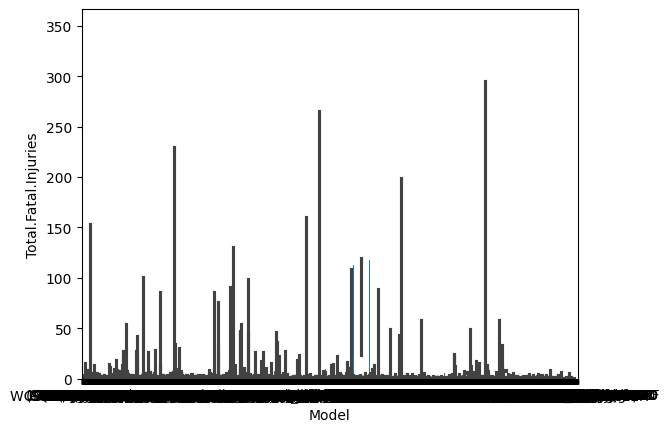

In [ ]:
sns.barplot(x='Model', y='Total.Fatal.Injuries', data=df)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


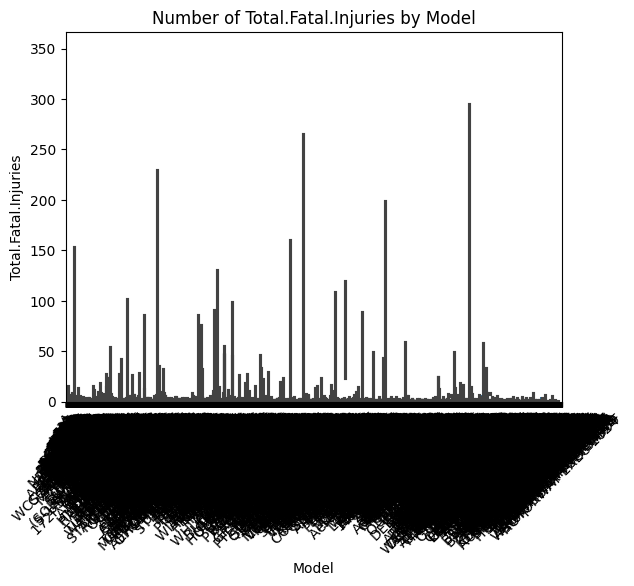

In [ ]:
sns.barplot(x='Model', y='Total.Fatal.Injuries', data=df)
plt.title('Number of Total.Fatal.Injuries by Model')
plt.xlabel('Model')
plt.ylabel('Total.Fatal.Injuries')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Engine.Type', ylabel='Total.Fatal.Injuries'>

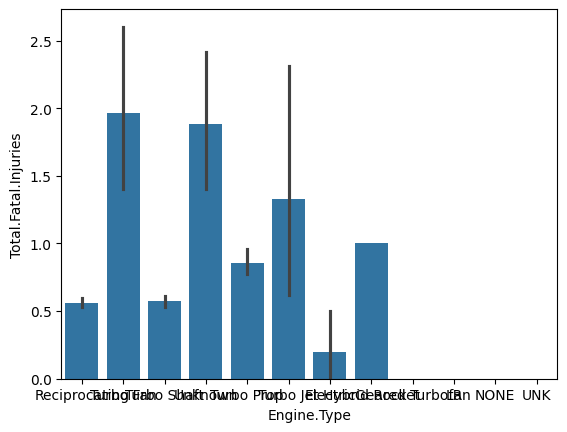

In [ ]:
# engine type and total fatal injuries
sns.barplot(x='Engine.Type', y='Total.Fatal.Injuries', data=df)

<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

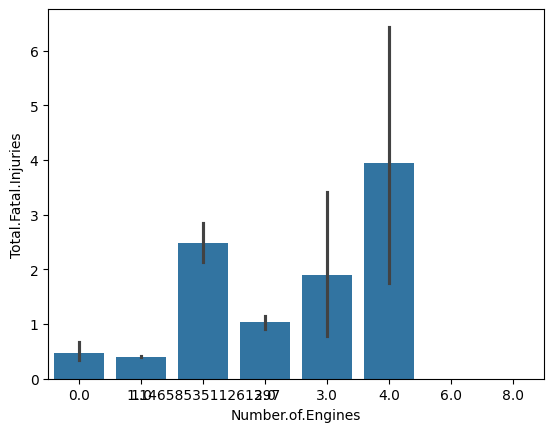

In [ ]:
#number of engine and total fatal injuries
sns.barplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=df)

<Axes: xlabel='Model', ylabel='Weather.Condition'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


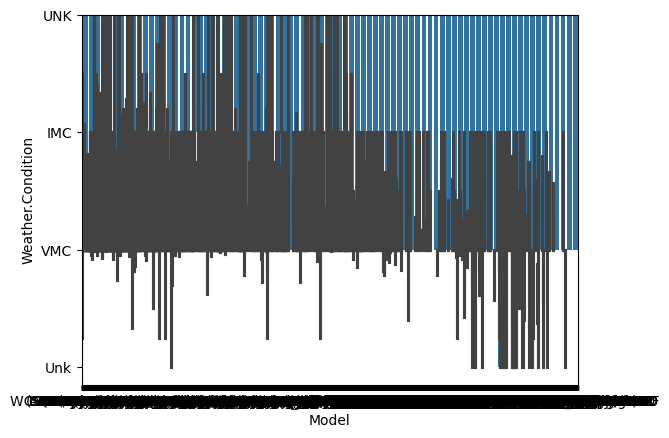

In [ ]:
# model and weather condition
sns.barplot(x='Model', y='Weather.Condition', data=df)